In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import rioxarray as rxr
import rasterstats

from shapely import wkt
from libpysal import weights

from cycler import cycler
from matplotlib import pyplot as plt

# global plotting settings
plt.style.use(['ggplot'])
default_cycler = (plt.rcParams['axes.prop_cycle'][:4]  +
                  cycler(linestyle=['-', '--', ':', '-.']))
plt.rcParams.update({'axes.grid' : True, 
                     'axes.facecolor' : 'white', 
                     'axes.edgecolor' : '.15',
                     'grid.color' : '.8',
                     'axes.prop_cycle' : default_cycler,
                     'figure.figsize' : (15, 5)
                    })


/home/otto/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
litho = gpd.read_file('litho0.geojson')

In [2]:
# land = xr.open_dataset('./umd_landcover_class_hd.asc').to_dataframe().reset_index()

# land = ( land.rename(columns={'band_data' : 'land',
#                            'x' : 'longitude',
#                            'y' : 'latitude'})
#              .drop(columns=['band', 'spatial_ref'])
#        )

# land = gpd.GeoDataFrame(land, 
#                         geometry=gpd.GeoSeries.from_xy(land.longitude, land.latitude), 
#                         crs='epsg:4326')

In [5]:
elev = xr.open_dataset('./GMTED2010_15n120_0500deg.nc').to_dataframe().reset_index()

elev = gpd.GeoDataFrame(elev, 
                        geometry=gpd.GeoSeries.from_xy(elev.longitude, elev.latitude), 
                        crs='epsg:4326')

elev = elev.drop(columns = ['nlat', 'nlon', 'nbounds', 'latitude_bounds', 'longitude_bounds'])

xstart = 10
xstop = 25
ystart = 17
ystop = 30

elev_sahara = elev.cx[xstart:xstop,ystart:ystop]

## reading csv if already written

In [2]:
litho_sahara = pd.read_csv('./LST_at_contacts_sahara_20211122.csv')

litho_sahara = gpd.GeoDataFrame(litho_sahara, geometry=gpd.GeoSeries.from_file('sahara.shp'))

litho_sahara_elev = litho_sahara.sjoin(elev_sahara, how='inner').drop(columns=['index_right', 'latitude_right', 'longitude_right'])

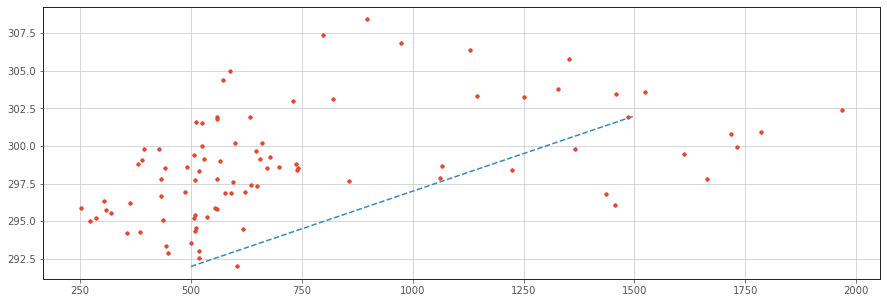

In [16]:
plt.plot(litho_sahara_elev['elevation'], litho_sahara_elev['LST_01'], '.')
plt.plot([500, 1500], [292, 302])

In [21]:
litho_sahara = litho_sahara.rename(columns = {'longitude_left' : 'longitude',
                    'latitude_left' : 'latitude'})

(17.0, 30.0)

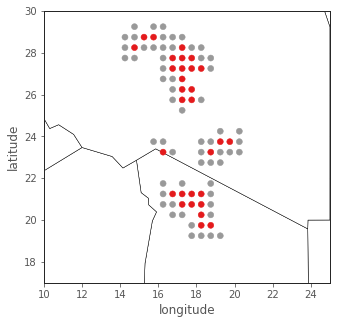

In [42]:
mask = (litho_sahara['contact1']==True) | (litho_sahara['contact2']==True)

xstart = 10
xstop = 25
ystart = 17
ystop = 30

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.cx[xstart:xstop, ystart:ystop].plot(color='white', edgecolor='black')

# modis.MOD11C3_006_LST_Day_CMG.plot(ax=ax)
# land.plot(ax=ax)

litho_sahara.cx[xstart:xstop, ystart:ystop].loc[mask].plot(column='glim', legend=False, ax=ax, cmap='Set1')

ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_xlim(xstart, xstop)
ax.set_ylim(ystart,ystop)
plt.savefig('output.jpg')
# ctx.add_basemap(ax)
# ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

In [23]:
litho_sahara.to_csv('LST_at_contacts_sahara_20211124.csv')

## writing LST to file

In [9]:
mask = (litho['contact1']==True) | (litho['contact2']==True)

xstart = 10
xstop = 25
ystart = 17
ystop = 30

litho_sahara = litho.cx[xstart:xstop,ystart:ystop]

litho_sahara.loc[mask].geometry.to_file('sahara.shp')

In [8]:
landr = rasterstats.point_query('sahara.shp', './umd_landcover_class_hd.asc', interpolate='nearest')

In [ ]:
modis_path = os.path.join('./MOD11C3v6_LST_K_day&night_2000_2020_moclim/LSTdaytime_nc/MOD11C3v6_LST_K_daytime_2000_2020_MONTH_01.nc')

modis01 = rasterstats.point_query('sahara.shp', modis_path, interpolate='nearest')

modis_path = os.path.join('./MOD11C3v6_LST_K_day&night_2000_2020_moclim/LSTdaytime_nc/MOD11C3v6_LST_K_daytime_2000_2020_MONTH_02.nc')

modis02 = rasterstats.point_query('sahara.shp', modis_path, interpolate='nearest')

modis_path = os.path.join('./MOD11C3v6_LST_K_day&night_2000_2020_moclim/LSTdaytime_nc/MOD11C3v6_LST_K_daytime_2000_2020_MONTH_03.nc')

modis03 = rasterstats.point_query('sahara.shp', modis_path, interpolate='nearest')

modis_path = os.path.join('./MOD11C3v6_LST_K_day&night_2000_2020_moclim/LSTdaytime_nc/MOD11C3v6_LST_K_daytime_2000_2020_MONTH_04.nc')

modis04 = rasterstats.point_query('sahara.shp', modis_path, interpolate='nearest')

modis_path = os.path.join('./MOD11C3v6_LST_K_day&night_2000_2020_moclim/LSTdaytime_nc/MOD11C3v6_LST_K_daytime_2000_2020_MONTH_05.nc')

modis05 = rasterstats.point_query('sahara.shp', modis_path, interpolate='nearest')

modis_path = os.path.join('./MOD11C3v6_LST_K_day&night_2000_2020_moclim/LSTdaytime_nc/MOD11C3v6_LST_K_daytime_2000_2020_MONTH_06.nc')

modis06 = rasterstats.point_query('sahara.shp', modis_path, interpolate='nearest')

modis_path = os.path.join('./MOD11C3v6_LST_K_day&night_2000_2020_moclim/LSTdaytime_nc/MOD11C3v6_LST_K_daytime_2000_2020_MONTH_07.nc')

modis07 = rasterstats.point_query('sahara.shp', modis_path, interpolate='nearest')

modis_path = os.path.join('./MOD11C3v6_LST_K_day&night_2000_2020_moclim/LSTdaytime_nc/MOD11C3v6_LST_K_daytime_2000_2020_MONTH_08.nc')

modis08 = rasterstats.point_query('sahara.shp', modis_path, interpolate='nearest')

modis_path = os.path.join('./MOD11C3v6_LST_K_day&night_2000_2020_moclim/LSTdaytime_nc/MOD11C3v6_LST_K_daytime_2000_2020_MONTH_09.nc')

modis09 = rasterstats.point_query('sahara.shp', modis_path, interpolate='nearest')

modis_path = os.path.join('./MOD11C3v6_LST_K_day&night_2000_2020_moclim/LSTdaytime_nc/MOD11C3v6_LST_K_daytime_2000_2020_MONTH_10.nc')

modis10 = rasterstats.point_query('sahara.shp', modis_path, interpolate='nearest')

modis_path = os.path.join('./MOD11C3v6_LST_K_day&night_2000_2020_moclim/LSTdaytime_nc/MOD11C3v6_LST_K_daytime_2000_2020_MONTH_11.nc')

modis11 = rasterstats.point_query('sahara.shp', modis_path, interpolate='nearest')

modis_path = os.path.join('./MOD11C3v6_LST_K_day&night_2000_2020_moclim/LSTdaytime_nc/MOD11C3v6_LST_K_daytime_2000_2020_MONTH_12.nc')

modis12 = rasterstats.point_query('sahara.shp', modis_path, interpolate='nearest')

In [ ]:
modf = gpd.GeoDataFrame(data = {'LST_01' : modis01,
                                'LST_02' : modis02,
                                'LST_03' : modis03,
                                'LST_04' : modis04,
                                'LST_05' : modis05,
                                'LST_06' : modis06,
                                'LST_07' : modis07,
                                'LST_08' : modis08,
                                'LST_09' : modis09,
                                'LST_10' : modis10,
                                'LST_11' : modis11,
                                'LST_12' : modis12,
                               }, 
                        geometry=gpd.GeoSeries.from_file('sahara.shp'), 
                        crs='epsg:4326')

In [30]:
litho_sahara = litho_sahara.sjoin(modf, how='inner').drop(columns='index_right')

In [ ]:
# elev_path = os.path.join('./GMTED2010_15n120_0500deg.nc')

# elev12 = rasterstats.point_query('sahara.shp', elev_path, interpolate='nearest')

In [67]:
maskvolc = litho_sahara['contact1']==True
masksed = litho_sahara['contact2']==True

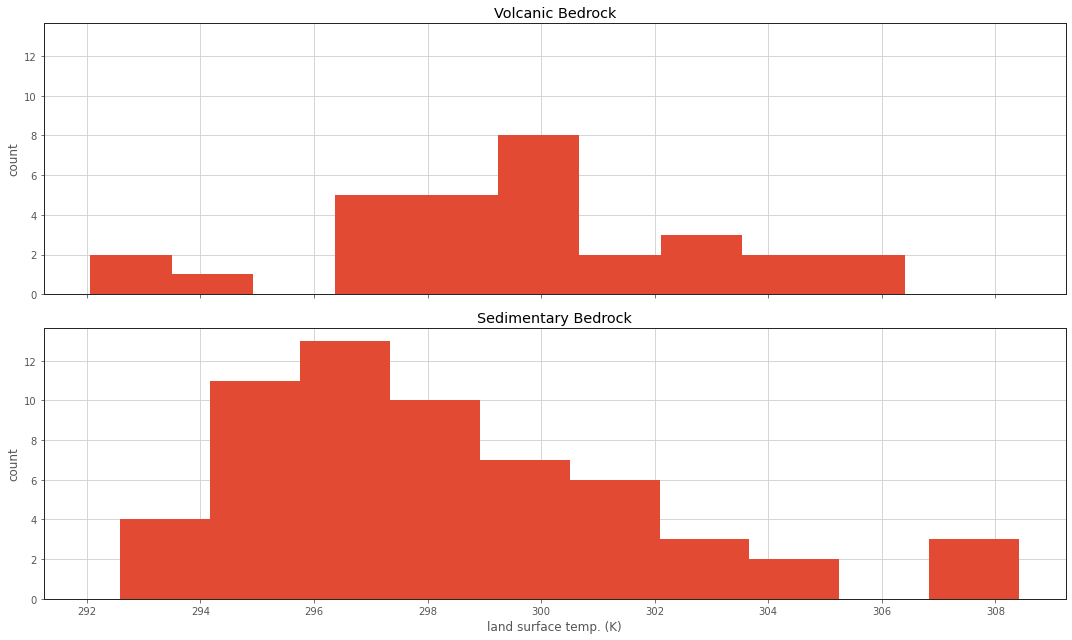

In [81]:
fig, ax = plt.subplots(2,1, sharex=True, sharey=True, figsize=(15,9))


ax[0].hist(litho_sahara.loc[maskvolc].LST_01)
ax[0].set(ylabel='count', title='Volcanic Bedrock')
ax[1].hist(litho_sahara.loc[masksed].LST_01)
ax[1].set(ylabel='count',title='Sedimentary Bedrock', xlabel='land surface temp. (K)')

plt.tight_layout()

In [31]:
# litho_sahara.to_csv('LST_at_contacts_sahara_20211122.csv')

In [18]:
litho.cx[xstart:xstop,ystart:ystop].loc[mask, 'modis_day'] = modisr

/home/otto/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/otto/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

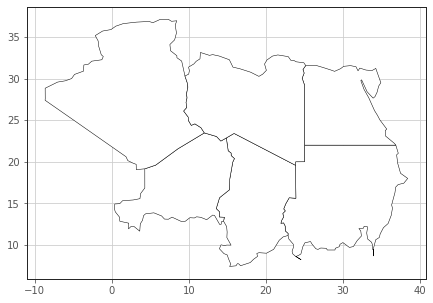

In [14]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.cx[xstart:xstop, ystart:ystop].plot(color='white', edgecolor='black')

# modis.MOD11C3_006_LST_Day_CMG.plot(ax=ax)
# land.plot(ax=ax)

elev.loc[mask].cx[xstart:xstop, ystart:ystop].plot(column='elevation', legend=True, ax=ax, cmap='OrRd', markersize=6)


ax.set_xlim(xstart, xstop)
ax.set_ylim(ystart,ystop)

In [ ]:
points = litho.geometry.to_json()

In [5]:
litho.geometry.to_file('litho.shp')

In [ ]:
landr = rasterstats.point_query('litho.shp', './umd_landcover_class_hd.asc', interpolate='nearest')

In [ ]:
modis_path = os.path.join('./MOD11C3v6_LST_K_day&night_2000_2020_moclim/LSTdaytime_nc/MOD11C3v6_LST_K_daytime_2000_2020_MONTH_01.nc')

modisr = rasterstats.point_query('litho.shp', modis_path, interpolate='nearest')

In [4]:
landr = rasterstats.point_query(points, './umd_landcover_class_hd.asc', interpolate='nearest')

<AxesSubplot:>

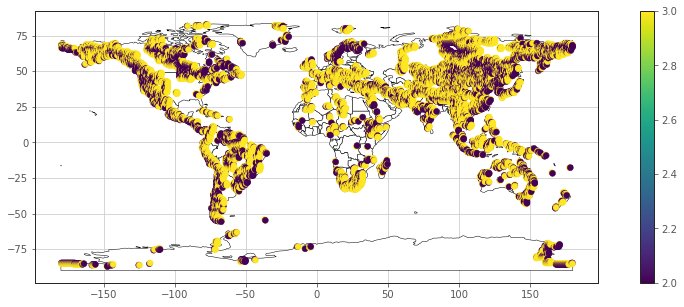

In [69]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black')

mask = (litho['contact1']==1) | (litho['contact2']==1)
litho.loc[mask].plot(column='glim', legend=True, ax=ax)

## Cleaning original litho file

In [53]:
litho = litho.replace([None], np.nan)
litho.loc[:, ['contact1', 'contact2']] = litho.loc[:, ['contact1', 'contact2']].replace('1', 1)

In [56]:
litho.loc[:, ['contact1', 'contact2']] = litho.loc[:, ['contact1', 'contact2']].replace(np.nan, 0)

In [54]:
litho.iloc[42]['contact2'] == '1'

False

In [62]:
litho = litho.drop(columns='contact')